In [1]:
import pandas as pd
import MySQLdb

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
db = MySQLdb.connect(host="172.18.55.6",    # tu host, usualmente localhost
                     user="comandato",      # tu usuario
                     passwd="comandato123",  # tu password
                     db="SISTEMECUADOR_ATM")        # el nombre de la base de datos

In [4]:
mes=3

In [5]:
writer = pd.ExcelWriter('ASIGNACION MES NOVIEMBRE.xlsx', engine='xlsxwriter')

In [6]:
totales=""" SELECT *  FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0}""".format(mes)

In [7]:
total=pd.read_sql(totales, con=db)

In [8]:
total.to_excel(writer, sheet_name='TOTAL')
worksheet = writer.sheets['TOTAL']

In [9]:
infractores=""" SELECT Cedula,count(*) as multas,
                    sum(Saldo) as monto,Segmento,Cartera,
                    min(Dias_mora) as menor_mora,max(Dias_mora) as mayor_mora,
                    min(Dia) as ingreso_min,max(Dia) as ingreso_max
                FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0} group by Cedula,Cartera""".format(mes)

In [10]:
resultado=pd.read_sql(infractores, con=db)

In [11]:
resultado.tail()

,Cedula,multas,monto,Segmento,Cartera,menor_mora,mayor_mora,ingreso_min,ingreso_max
37055,FB587397,1,19.3,MULTAS NUEVAS,CORRIENTE,246,246,6,6
37056,FB591820,1,386.0,MULTAS NUEVAS,CORRIENTE,219,219,6,6
37057,I685506,1,57.9,MULTAS NUEVAS,CORRIENTE,103,103,6,6
37058,PE102221,1,115.8,MULTAS NUEVAS,CORRIENTE,205,205,6,6
37059,XDA822644,3,289.5,MULTAS NUEVAS,CORRIENTE,71,301,8,8


In [12]:
def agregar_ceros(base):
    ced=base['Cedula']
    if len(ced)==9 or len(ced)==12 :
        if ced.isdigit():
            return '0'+ced
    return ced

In [13]:
resultado['Cedula']=resultado.apply(agregar_ceros,axis=1)

In [14]:
resultado.head()

,Cedula,multas,monto,Segmento,Cartera,menor_mora,mayor_mora,ingreso_min,ingreso_max
0,00042448K,1,115.8,MULTAS NUEVAS,CORRIENTE,135,135,6,6
1,0100025030,1,19.3,MULTAS NUEVAS,CORRIENTE,312,312,6,6
2,1000400828,1,115.8,MULTAS NUEVAS,CORRIENTE,187,187,8,8
3,1000558195,1,394.0,5. VENCIDA FASE II,CORRIENTE,12,12,6,6
4,1000559797,6,1036.8,MULTAS NUEVAS,CORRIENTE,15,492,6,6


In [15]:
multas=""" SELECT Dia,count(*) as num_multas,sum(Saldo) as monto
                FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0} group by Dia""".format(mes)

In [16]:
resultado_multas=pd.read_sql(multas, con=db)

In [17]:
resultado.groupby(['ingreso_min']).Cedula.count()

ingreso_min
6     32408
7       107
8       516
11      680
12      271
13      165
14      291
15      255
18      662
19      316
20      190
21      150
22      236
25      813
Name: Cedula, dtype: int64

In [18]:
resultado_multas

,Dia,num_multas,monto
0,6,64521,5134798.76
1,7,142,11816.40
2,8,1451,153763.65
3,11,916,96678.10
4,12,366,44837.20
5,13,231,31120.30
6,14,463,69182.30
7,15,302,43771.20
8,18,852,108216.30
9,19,388,66802.70


In [19]:
resultado.to_excel(writer, sheet_name='BASE')
worksheet = writer.sheets['BASE']

In [20]:
resultado_multas.to_excel(writer, sheet_name='multas')
worksheet = writer.sheets['multas']

In [21]:
writer.save()

In [22]:
resultado_multas.set_index('Dia',inplace=True)

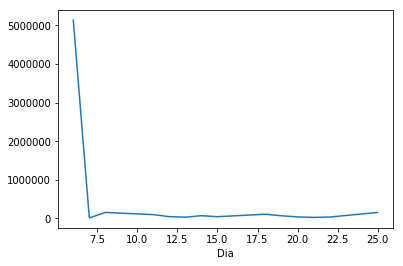

In [23]:
resultado_multas['monto'][:].plot.line()

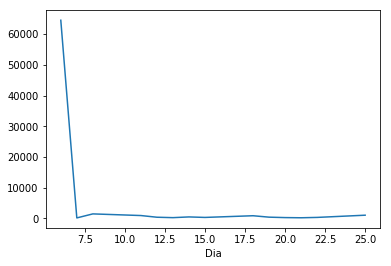

In [24]:
resultado_multas[:]['num_multas'].plot.line()

In [25]:
resultado_multas.sum()

num_multas      71404.00
monto         6013211.61
dtype: float64